In [76]:
import numpy as np
import pandas as pd

%run settings/plt_settings.ipynb
%run settings/db_connect.ipynb

## ucitavamo rezultate za kw

In [547]:
%run parsers/keywords_parser.ipynb
kw_list = parse_keywlist('data/IN/keywlist.txt')
kw_name_dict = {rec.get_name(): rec for rec in kw_list}

In [548]:
top20dis2007 = pd.read_csv('data/IN/top20dis2007.csv')
top20ord2007 = pd.read_csv('data/IN/top20ord2007.csv')

In [556]:
Fj_kw_stat.query("kw=='KW-0030'")

,name,n,avg_len,avg_dis,z,p
kw,,,,,,
KW-0030,Aminoacyl-tRNA synthetase,243,673.711934,0.674897,-1.788565,0.043


In [549]:
Fj_kw_stat = pd.read_csv('data/OUT/FJ_kw_stat.csv', index_col='kw')
Fj_kw_valid = (Fj_kw_stat.query(' p<0.05 or p>0.95 and n>=20')
                         .sort_values('z', ascending=False))

print(f"""
Od ukupno {len(Fj_kw_stat)} MF kljucnih reci, {len(Fj_kw_valid)} su statisticki znacajne
od cega su {len(Fj_kw_valid.query('p<0.5'))} uredjene, a {len(Fj_kw_valid.query('p>0.5'))} neuredjene.
""")

Fj_kw_valid_dis = Fj_kw_valid.query('p>0.5')
Fj_kw_valid_ord = Fj_kw_valid.query('p<0.5').iloc[::-1]
Fj_kw_valid.head()


Od ukupno 186 MF kljucnih reci, 97 su statisticki znacajne
od cega su 53 uredjene, a 44 neuredjene.



,name,n,avg_len,avg_dis,z,p
kw,,,,,,
KW-0238,DNA-binding,6518,546.531912,0.871126,46.904973,1.0
KW-0217,Developmental protein,3897,655.208622,0.859379,31.096980,1.0
KW-0010,Activator,2574,600.510101,0.878788,28.115824,1.0
KW-0678,Repressor,1988,589.294769,0.852113,22.628029,1.0
KW-0694,RNA-binding,2728,575.764296,0.763563,16.617519,1.0


In [550]:
Fj_kw_stat_random = pd.read_csv('data/OUT/FJ_kw_stat_random.csv', index_col='kw')
Fj_kw_valid_random = (Fj_kw_stat_random.query(' p<0.05 or p>0.95 and n>=20')
                         .sort_values('z', ascending=False))
print(f"""
Od ukupno {len(Fj_kw_stat_random)} MF kljucnih reci, {len(Fj_kw_valid_random)} su statisticki znacajne
od cega su {len(Fj_kw_valid_random.query('p<0.5'))} uredjene, a {len(Fj_kw_valid_random.query('p>0.5'))} neuredjene.
""")


Od ukupno 186 MF kljucnih reci, 91 su statisticki znacajne
od cega su 47 uredjene, a 44 neuredjene.



In [551]:
FJ_kw_cmp = Fj_kw_stat.join(Fj_kw_stat_random, rsuffix='_rand')
FJ_kw_cmp['z_dif'] = pd.Series(FJ_kw_cmp.z - FJ_kw_cmp.z_rand, index=FJ_kw_cmp.index)
FJ_kw_cmp = FJ_kw_cmp[['name', 'n', 'avg_len', 'avg_dis', 'z', 'z_dif', 'z_rand', 'p', 'p_rand']]

Fj_kw_valid_random = (FJ_kw_cmp.query('n>=20 and (p<0.05 or p_rand<0.05 or p>0.95 and p_rand>0.95)')
                         .sort_values('z', ascending=False))

#Fj_kw_valid_random.name = [ "%s (%4d) %3.f" % (row.name, row.n, row.avg_len) for row in Fj_kw_valid_random.itertuples()]
#Fj_kw_valid_random.name = [ "%s %0.2f %3.f" % (row.name, row.avg_dis, row.avg_len) for row in Fj_kw_valid_random.itertuples()]


Fj_kw_valid_random_dis = Fj_kw_valid_random.query('p>0.95 or p_rand>0.95')
Fj_kw_valid_random_ord = Fj_kw_valid_random.query('p<0.05 or p_rand<0.05').iloc[::-1]


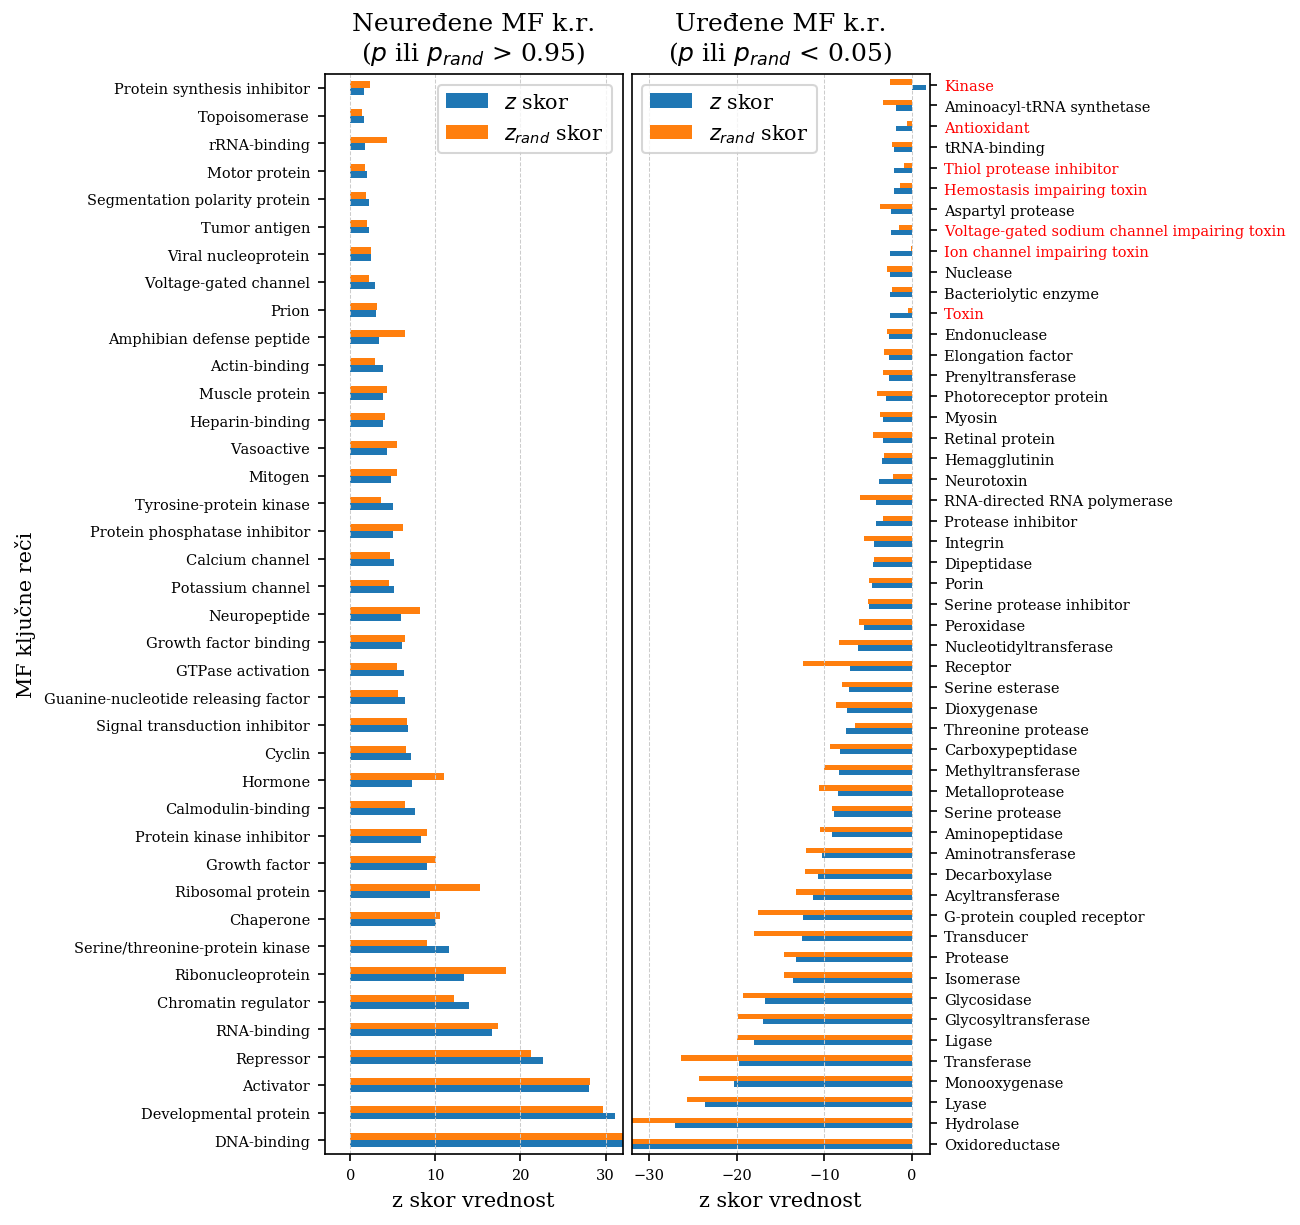

In [529]:

plt.close()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5,8))
ax2.yaxis.tick_right()
ax1.set_xlim(left=-3, right=32)
ax2.set_xlim(left=-32, right=2)

Fj_kw_valid_random_ord.set_index('name')[['z', 'z_rand']].plot(kind='barh', ax=ax2)
Fj_kw_valid_random_dis.set_index('name')[['z', 'z_rand']].plot(kind='barh', ax=ax1)

not_stat_ord = set(Fj_kw_valid_random_ord.query(' not( p<0.05 and p_rand<0.05)').name)
not_stat_dis = set(Fj_kw_valid_random_dis.query(' not( p>0.95 and p_rand>0.95)').name)

[i.set_color("red") for i in ax1.get_yticklabels() if i.get_text() in not_stat_dis]
[i.set_color("red") for i in ax2.get_yticklabels() if i.get_text() in not_stat_ord]


L=ax1.legend()
L.get_texts()[0].set_text('$z$ skor')
L.get_texts()[1].set_text('$z_{rand}$ skor')
L=ax2.legend()
L.get_texts()[0].set_text('$z$ skor')
L.get_texts()[1].set_text('$z_{rand}$ skor')


ax1.set_title("Neuređene MF k.r.\n($p$ ili $p_{rand}$ > 0.95)")
ax2.set_title("Uređene MF k.r.\n($p$ ili $p_{rand}$ < 0.05)")
ax1.set_ylabel("MF ključne reči")
ax2.set_ylabel("")
ax1.set_xlabel("z skor vrednost" )
ax2.set_xlabel("z skor vrednost" )
ax1.grid(which='major', axis='y' )
ax2.grid(which='major', axis='y' )

plt.tight_layout(pad=0.1)
plt.savefig('plots/PL_and_PL_rand.pdf', dpi=300)

## ucitavamo rezultate za GO

In [552]:
Fj_go_stat = pd.read_csv('data/OUT/FJ_go_stat.csv', index_col='go')
Fj_go_valid = (Fj_go_stat.query(' p<0.05 or p>0.95 and n>=20')
                         .sort_values('z', ascending=False))
Fj_go_valid_dis = Fj_go_valid.query('p>0.5')
Fj_go_valid_ord = Fj_go_valid.query('p<0.5').iloc[::-1] 

## objedinjujemo mapiranja

In [358]:
kw2go = sql("""
select k.name as kw_name, g.name as go_name, 0 as status
    from kw2go join keywords k ON kw2go.kw = k.ac
      join goterms g ON kw2go.go = g.id
    where k.category='KW-9992' and g.namespace='MF'
""")

missing_mappings = pd.read_csv("./data/OUT/missing_mapping_table.csv")[["kw_name", "go_name"]].set_index("kw_name")
missing_mappings['status'] = [1 for _ in range(len(missing_mappings))]

combined_mappings = pd.concat([kw2go, missing_mappings])
zi_df = pd.read_csv("./data/OUT/missing_mapping_table.csv")
zi_df = zi_df.set_index(['kw_name', 'go_name'])

In [7]:
import pygraphviz as pgv
from IPython import display
from pprint import pprint

def nice_str(x):
    import numpy as np
    if type(x) is object:
        return x[:-7]+"..." if len(x)>10 else x
        
    if type(x) is np.float64:
        x = "%0.2f"%x 
    x = str(x)
    if x == '1.00': x = '1'
    if x == '0.00': x = '0'
    if len(x) > 30: x = x[:27]+'...'
    return x

def df2html(df, title=None, bg_col_map=None ):
    rows_list = []
    rows_list.append( '<tr><td>#</td>' + ' '.join([f"<td><i>{col_name}</i></td>" for col_name in df.columns]) + '</tr>')
    for i,(_, *xs) in enumerate(df.itertuples()): #for each row
        xs.insert(0, i)
        name = xs[1]
        bgcolor = 'bgcolor="' + bg_col_map.get(name, '#ffaaff') + '"' if bg_col_map else ''
        
        td_list = [ ([bgcolor], nice_str(x)) for x in xs ]
        td_list[0][0].append('port="%s_left"' % name)
        td_list[-1][0].append('port="%s_right"' % name)
        
        td_list_string = [ f'<td { " ".join(args) }> {text} </td>' for args, text in td_list ]

        rows_list.append( f'<tr>{" ".join(td_list_string)}</tr>')
        
    if title:
        rows_list = [f'<tr><td COLSPAN="7">{title}</td></tr>'] + rows_list
    
    table_str =  '<<table border="0" cellborder="1" cellspacing="0" >\n' +\
                 '\n'.join(rows_list)                                                +\
                 '\n</table>>'
    return table_str

def add_edges(G, left, right):
    ports = set.intersection( set(left.name),  set(right.name) )
    for port in ports:
        G.add_edge('A', 'B', tailport=port+'_right', headport=port+'_left', penwidth=1.5)
        

In [448]:
def draw_3_tables(**argv):
    draw_tables(**argv, what='left')
    draw_tables(**argv, what='right')
    return draw_tables(**argv)

def draw_tables(kw_old, kw_new, go_df, mapping, out_path=None, title_a=None, title_b=None, title_c=None, what=None):
        
    G = pgv.AGraph(directed=True, rankdir='LR', strict=False, splines='false',nodesep=0, ranksep=1, margin=0 )
    
    kw_ports = set.intersection( set(kw_old.name),  set(kw_new.name) )
    
    white, red, green = np.array([1,1,1]), np.array([1, 0.7, 0.7]), np.array([0.7, 1, 0.7])
    
    A_colors = { x: "#ffffff" if x in kw_ports else "#ffaaaa" for x in kw_old.name}
    B_colors = { x: "#ffffff" if x in kw_ports or i>20 else "#aaffaa" for i, x in enumerate(kw_new.name)}
    
    mapping_names = set(mapping.index)
    for name, color in list(B_colors.items()):
        if name not in mapping_names:
            B_colors[name] = '#ffaaaa' if B_colors[name]=='#ffffff' else '#aaaa88' 
            
    G.add_node("B", label=df2html(kw_new, title=title_b, bg_col_map=B_colors), shape='none')
   
    if what != 'right':
        G.add_node("A", label=df2html(kw_old, title=title_a, bg_col_map=A_colors), shape='none')
        for port in kw_ports:
            G.add_edge('A', 'B', tailport=port+'_right', headport=port+'_left', penwidth=1.5)

    if what != 'left':
        G.add_node("C", label=df2html(go_df, title=title_c), shape='none')
        b_names = set(kw_new.name)
        go_names = set(go_df.name)



        for kwname, goname, status in mapping.itertuples():
            if kwname in b_names and  goname in go_names:
                style = '' if status == 0 else 'dashed'
                G.add_edge('B', 'C', tailport=kwname+'_right', headport=goname+'_left', penwidth=1, style=style)


    G.layout(prog='dot')
    if out_path:
        out_path += '_'+what if what else ''
        G.draw(out_path+'.pdf', format='pdf')
    if what is None:
        return display.display_svg(G.draw(format='svg'), raw=True)

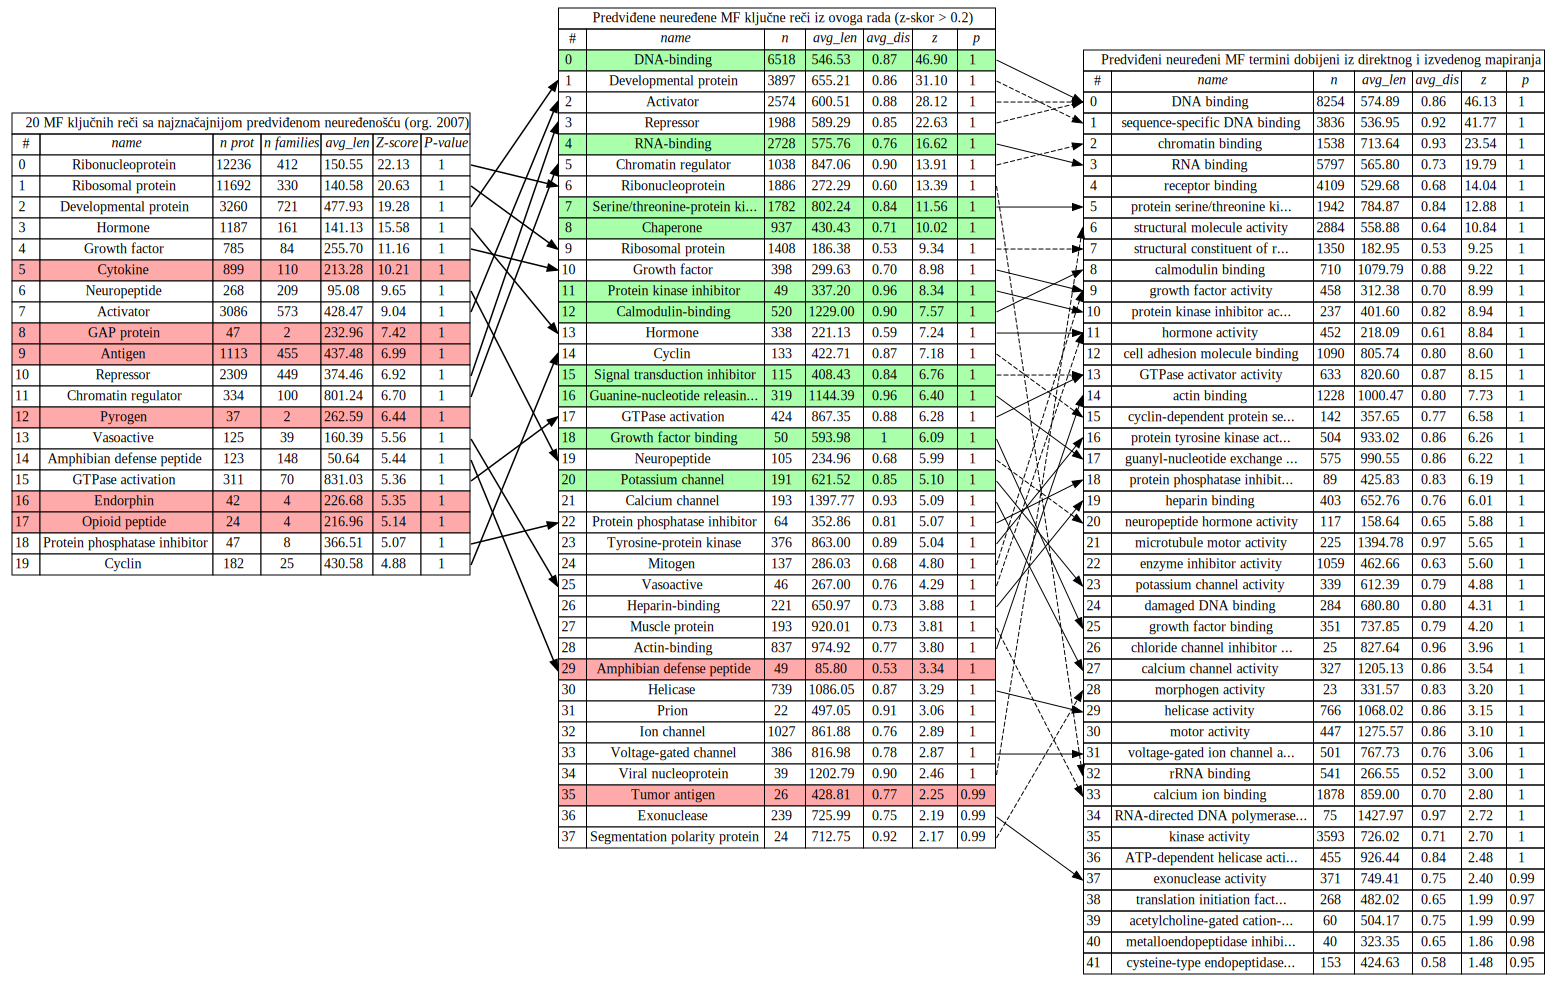

In [553]:
top_kw_dis = Fj_kw_valid_dis.query("z>2")
top_go_dis = Fj_go_valid_dis[ Fj_go_valid_dis.name.isin(set(combined_mappings.go_name)) ]

draw_3_tables(kw_old=top20dis2007, kw_new=top_kw_dis, go_df=top_go_dis, mapping=combined_mappings,  out_path='./plots/disorder_cmp',
           title_a='20 MF ključnih reči sa najznačajnijom predviđenom neuređenošću (org. 2007)',
           title_b='Predviđene neuređene MF ključne reči iz ovoga rada (z-skor &gt; 0.2)',
           title_c='Predviđeni neuređeni MF termini dobijeni iz direktnog i izvedenog mapiranja')

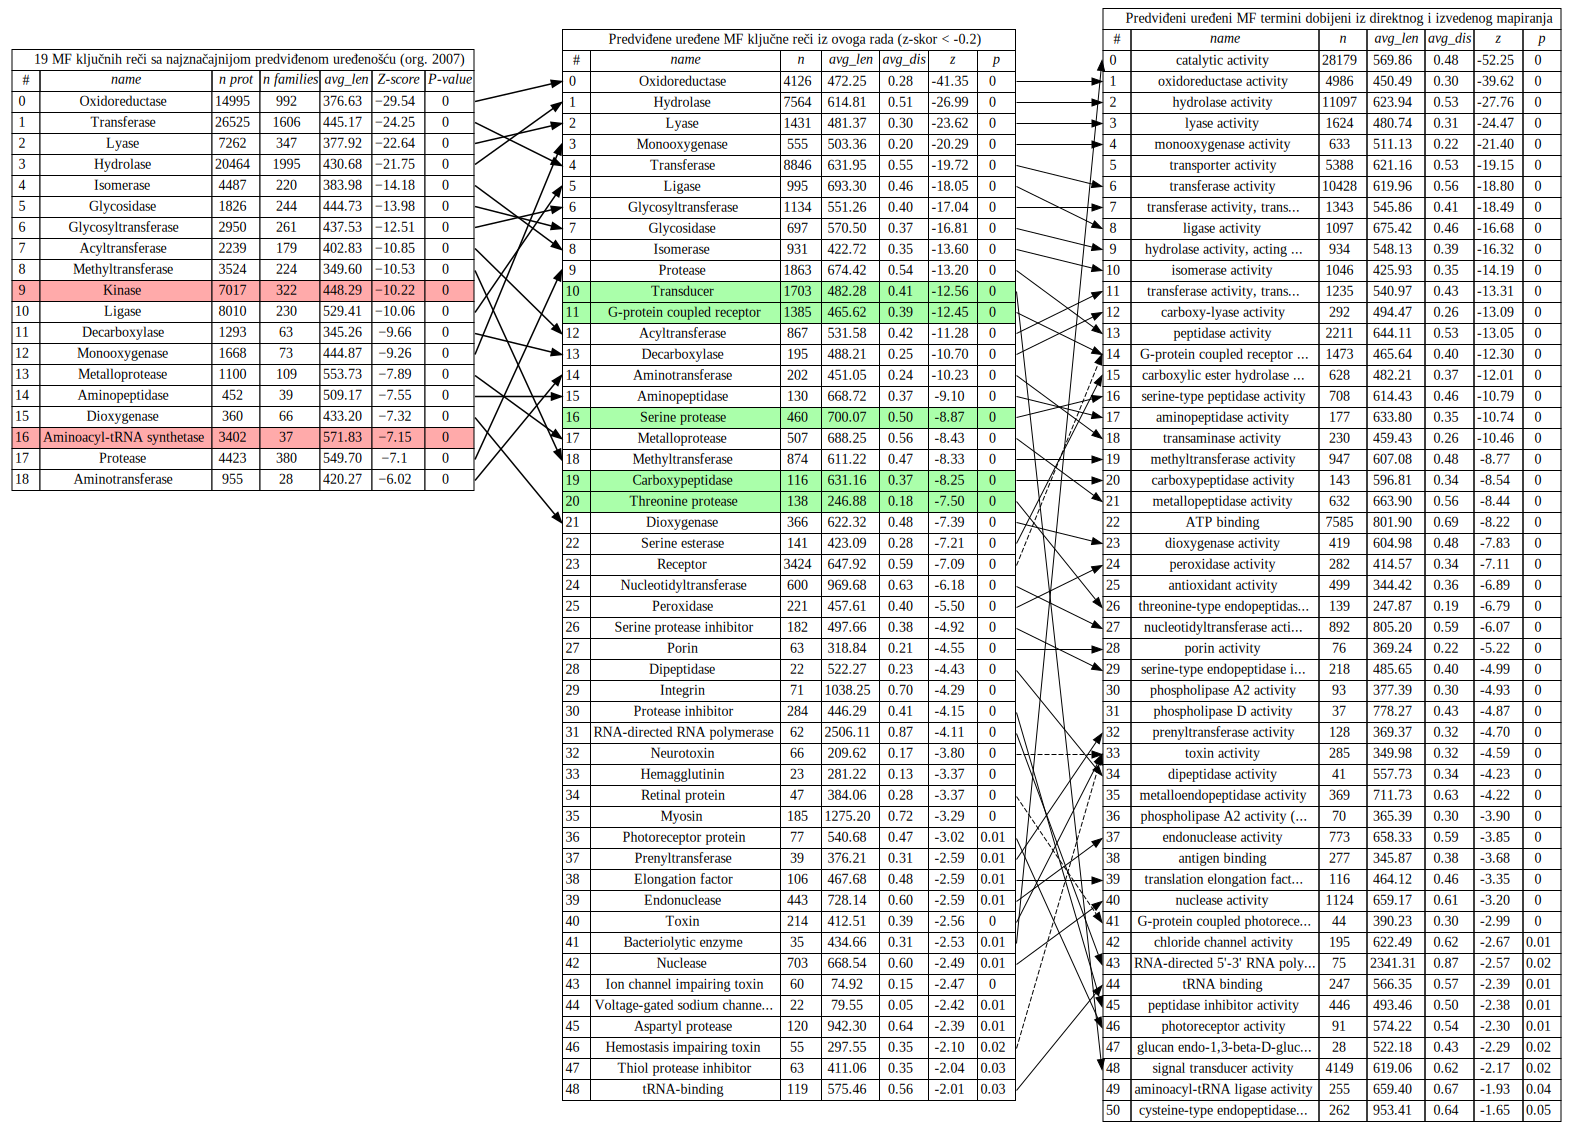

In [561]:
top_kw_ord = Fj_kw_valid_ord.query("z<-2 and n>=20")
top_go_ord = Fj_go_valid_ord[ Fj_go_valid_ord.name.isin(set(combined_mappings.go_name)) ]

draw_tables(kw_old=top20ord2007, kw_new=top_kw_ord, go_df=top_go_ord, mapping=combined_mappings, out_path='./plots/order_cmp',
           title_a='19 MF ključnih reči sa najznačajnijom predviđenom uređenošću (org. 2007)',
           title_b='Predviđene uređene MF ključne reči iz ovoga rada (z-skor &lt; -0.2)',
           title_c='Predviđeni uređeni MF termini dobijeni iz direktnog i izvedenog mapiranja')

### GO sa preko 1000 pridruzeni proteina

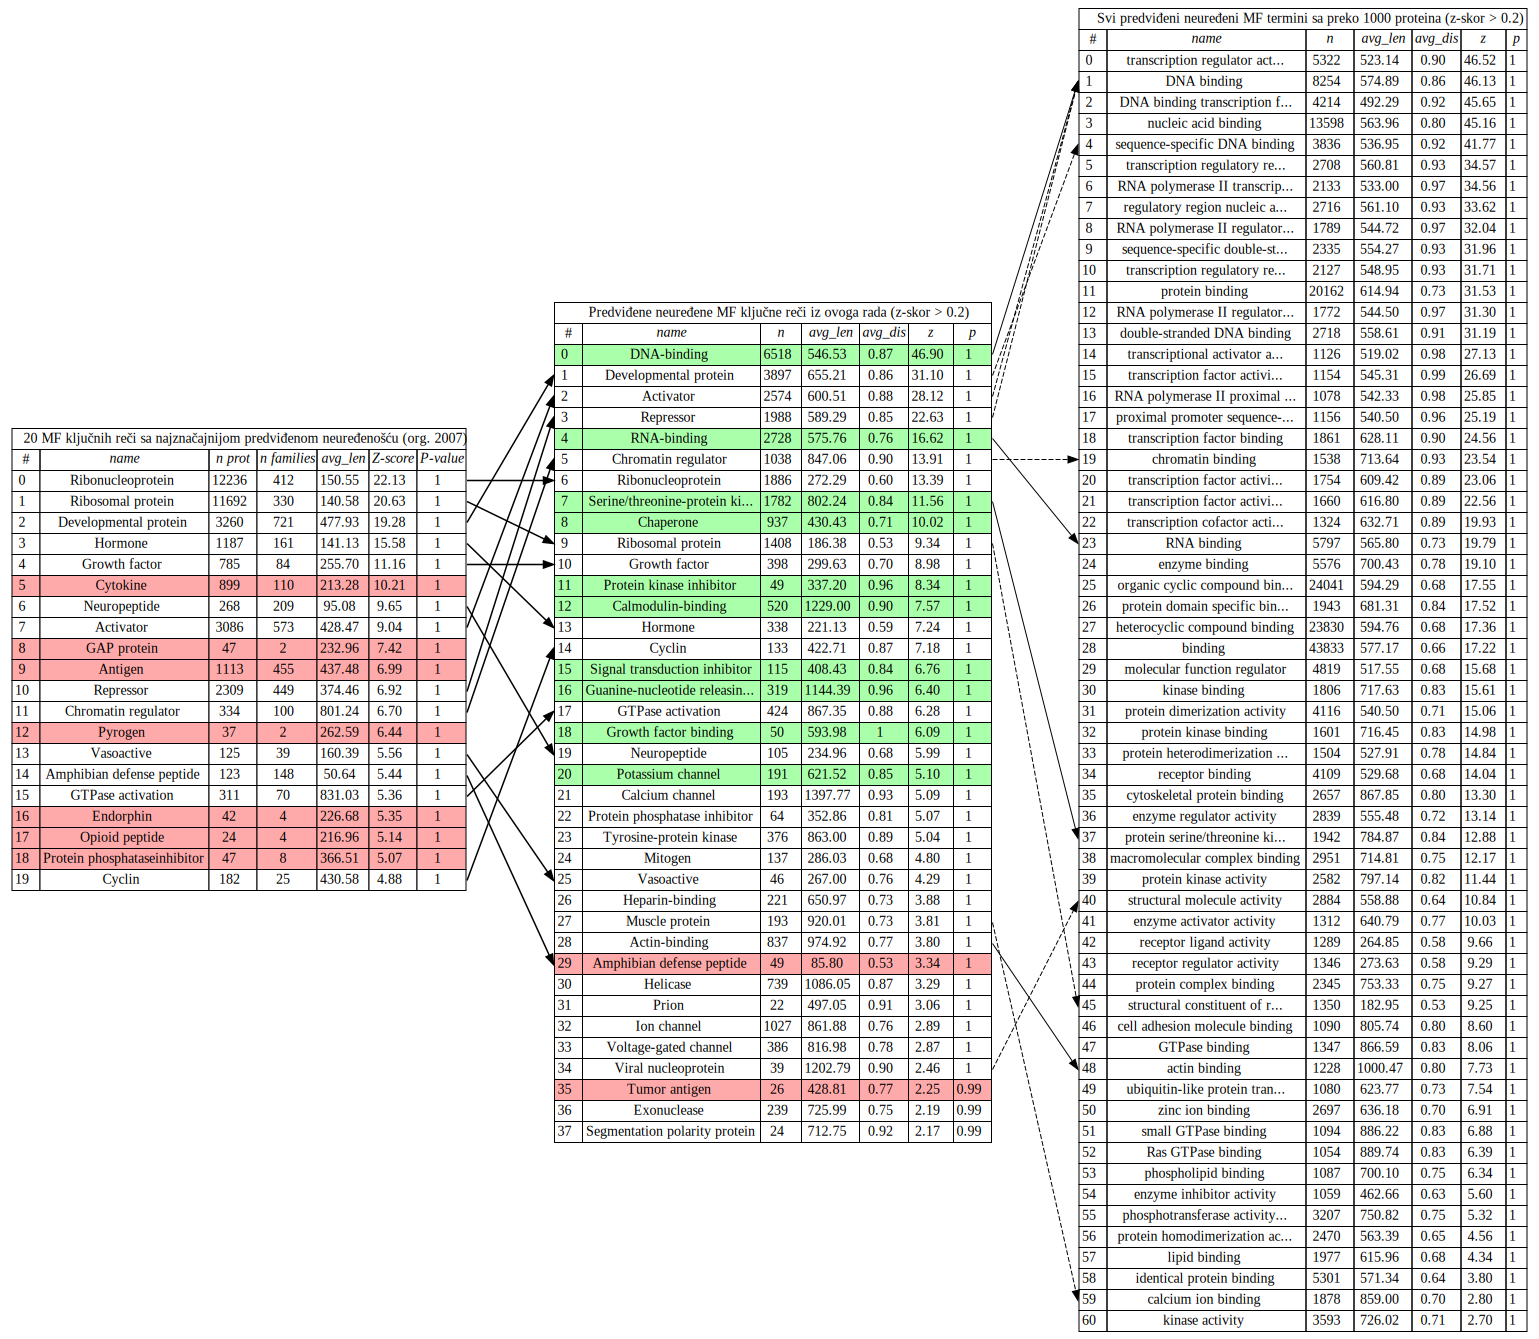

In [447]:
top_kw_dis = Fj_kw_valid_dis.query("z>2")
top_go_dis = Fj_go_valid_dis.query("z>2 and n>1000")

draw_tables(kw_old=top20dis2007, kw_new=top_kw_dis, go_df=top_go_dis, mapping=combined_mappings,  out_path='./plots/disorder_cmp_1000',
           title_a='20 MF ključnih reči sa najznačajnijom predviđenom neuređenošću (org. 2007)',
           title_b='Predviđene neuređene MF ključne reči iz ovoga rada (z-skor &gt; 0.2)',
           title_c='Svi predviđeni neuređeni MF termini sa preko 1000 proteina (z-skor &gt; 0.2)')

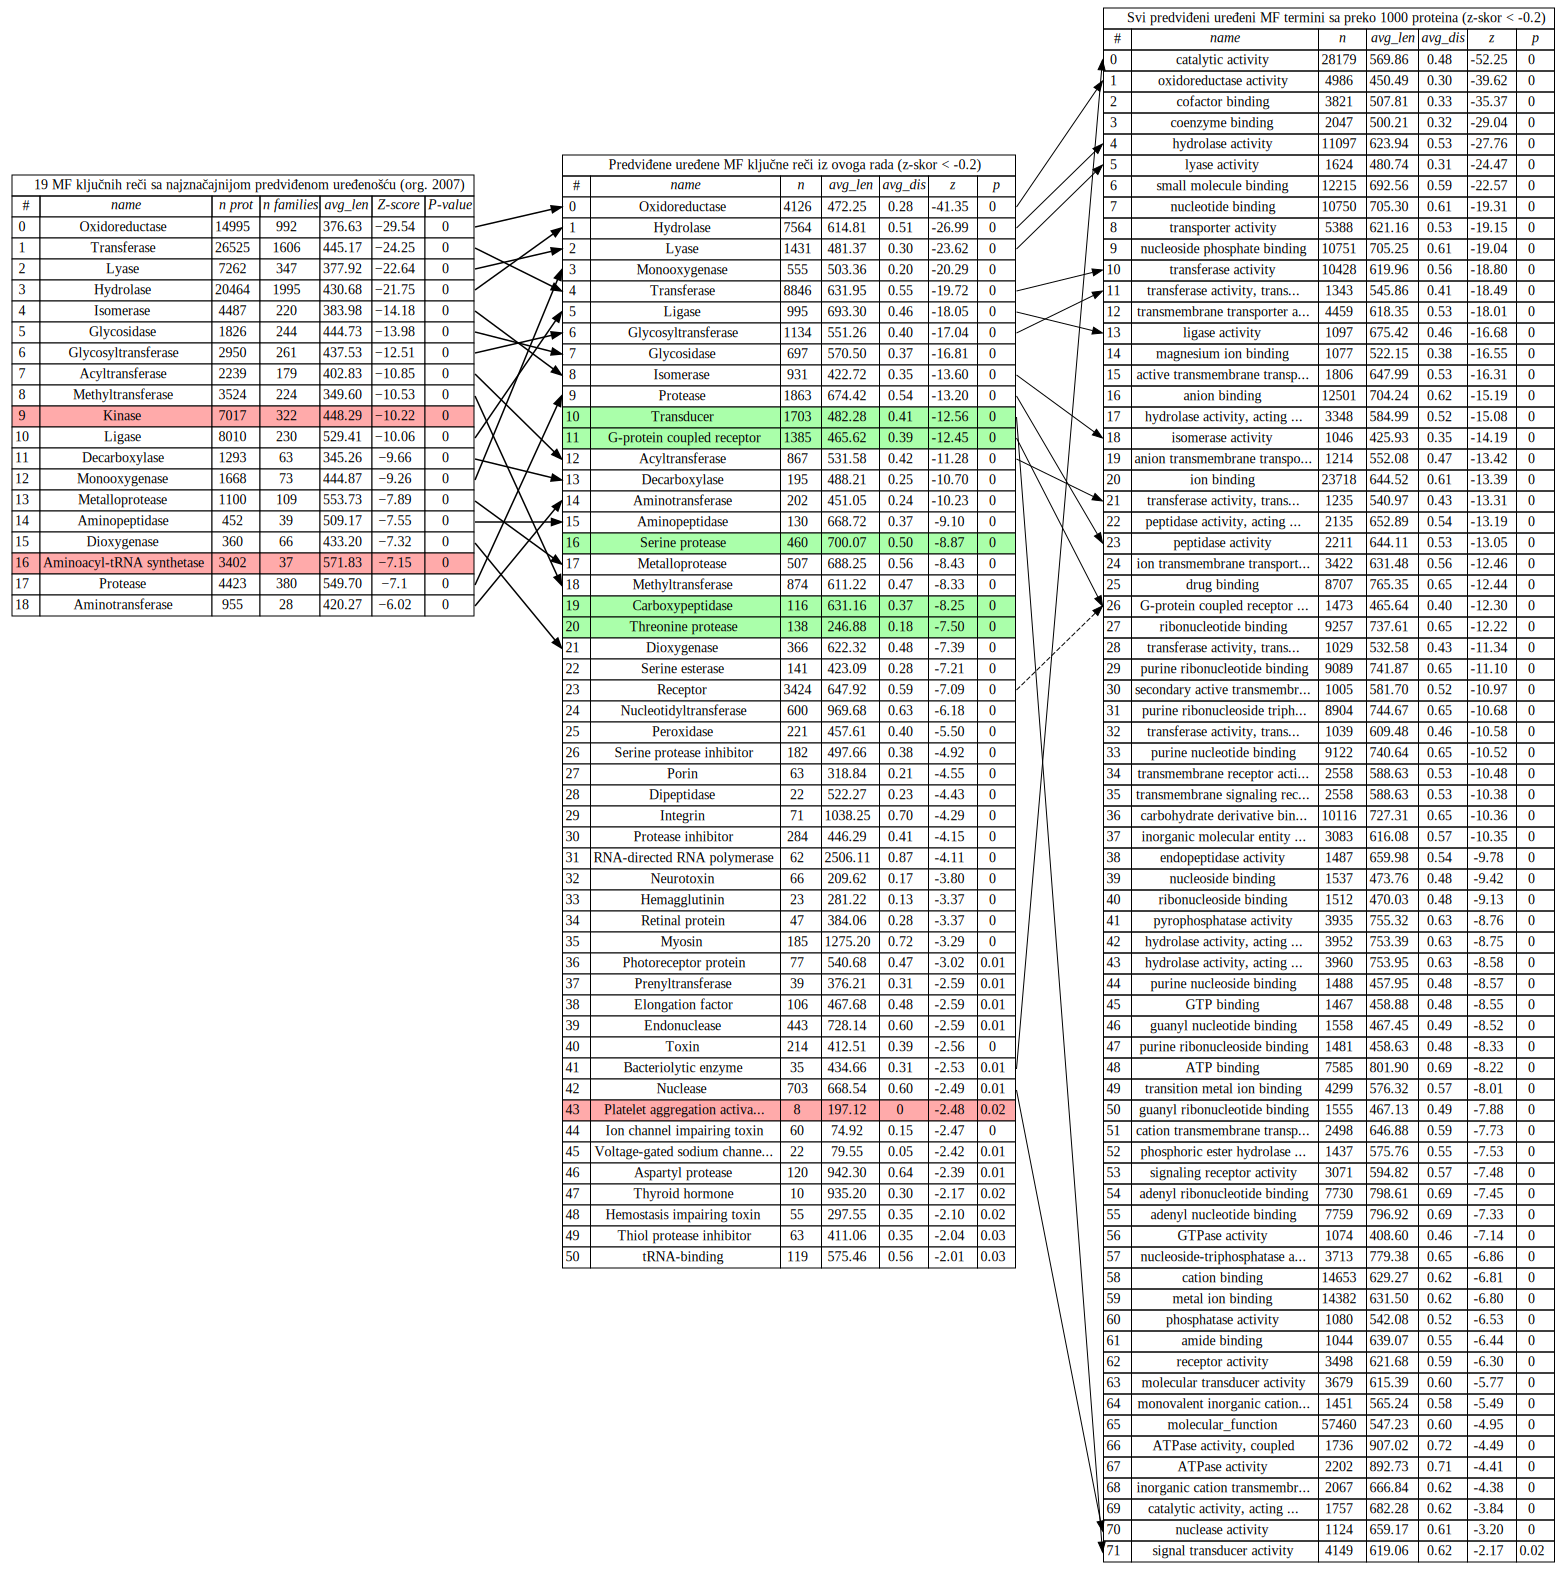

In [445]:
top_kw_ord = Fj_kw_valid_ord.query("z<-2")
top_go_ord = Fj_go_valid_ord.query('z<-2 and n>1000')

draw_tables(kw_old=top20ord2007, kw_new=top_kw_ord, go_df=top_go_ord, mapping=combined_mappings, out_path='./plots/order_cmp_1000',
           title_a='19 MF ključnih reči sa najznačajnijom predviđenom uređenošću (org. 2007)',
           title_b='Predviđene uređene MF ključne reči iz ovoga rada (z-skor &lt; -0.2)',
           title_c='Svi predviđeni uređeni MF termini sa preko 1000 proteina (z-skor &lt; -0.2)')

# GO grafik

In [11]:
import pygraphviz as pgv
from IPython import display
from pprint import pprint

In [12]:
%run parsers/obo_parser.py 
import json
with open("data/IN/go.json", "r") as obo_file:
    term_list = [Term(t['id'], t) for t in json.load(obo_file)]
    term_dict = {term.id: term for term in term_list}
    term_dict_name = {term.name: term for term in term_list}

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('viridis') )

    
def encode_color(rgb_color):
    cs = rgb_color[:3]
    cs = [hex(int(c*256))[2:].upper() for c in cs]
    cs = [ c if len(c)==2 else "0"+c for c in cs]
    return "#"+"".join(cs)

def get_color(x):
    return encode_color( scalarMap.to_rgba(x) )

get_color(1), get_color(1)

('#FEE724', '#FEE724')

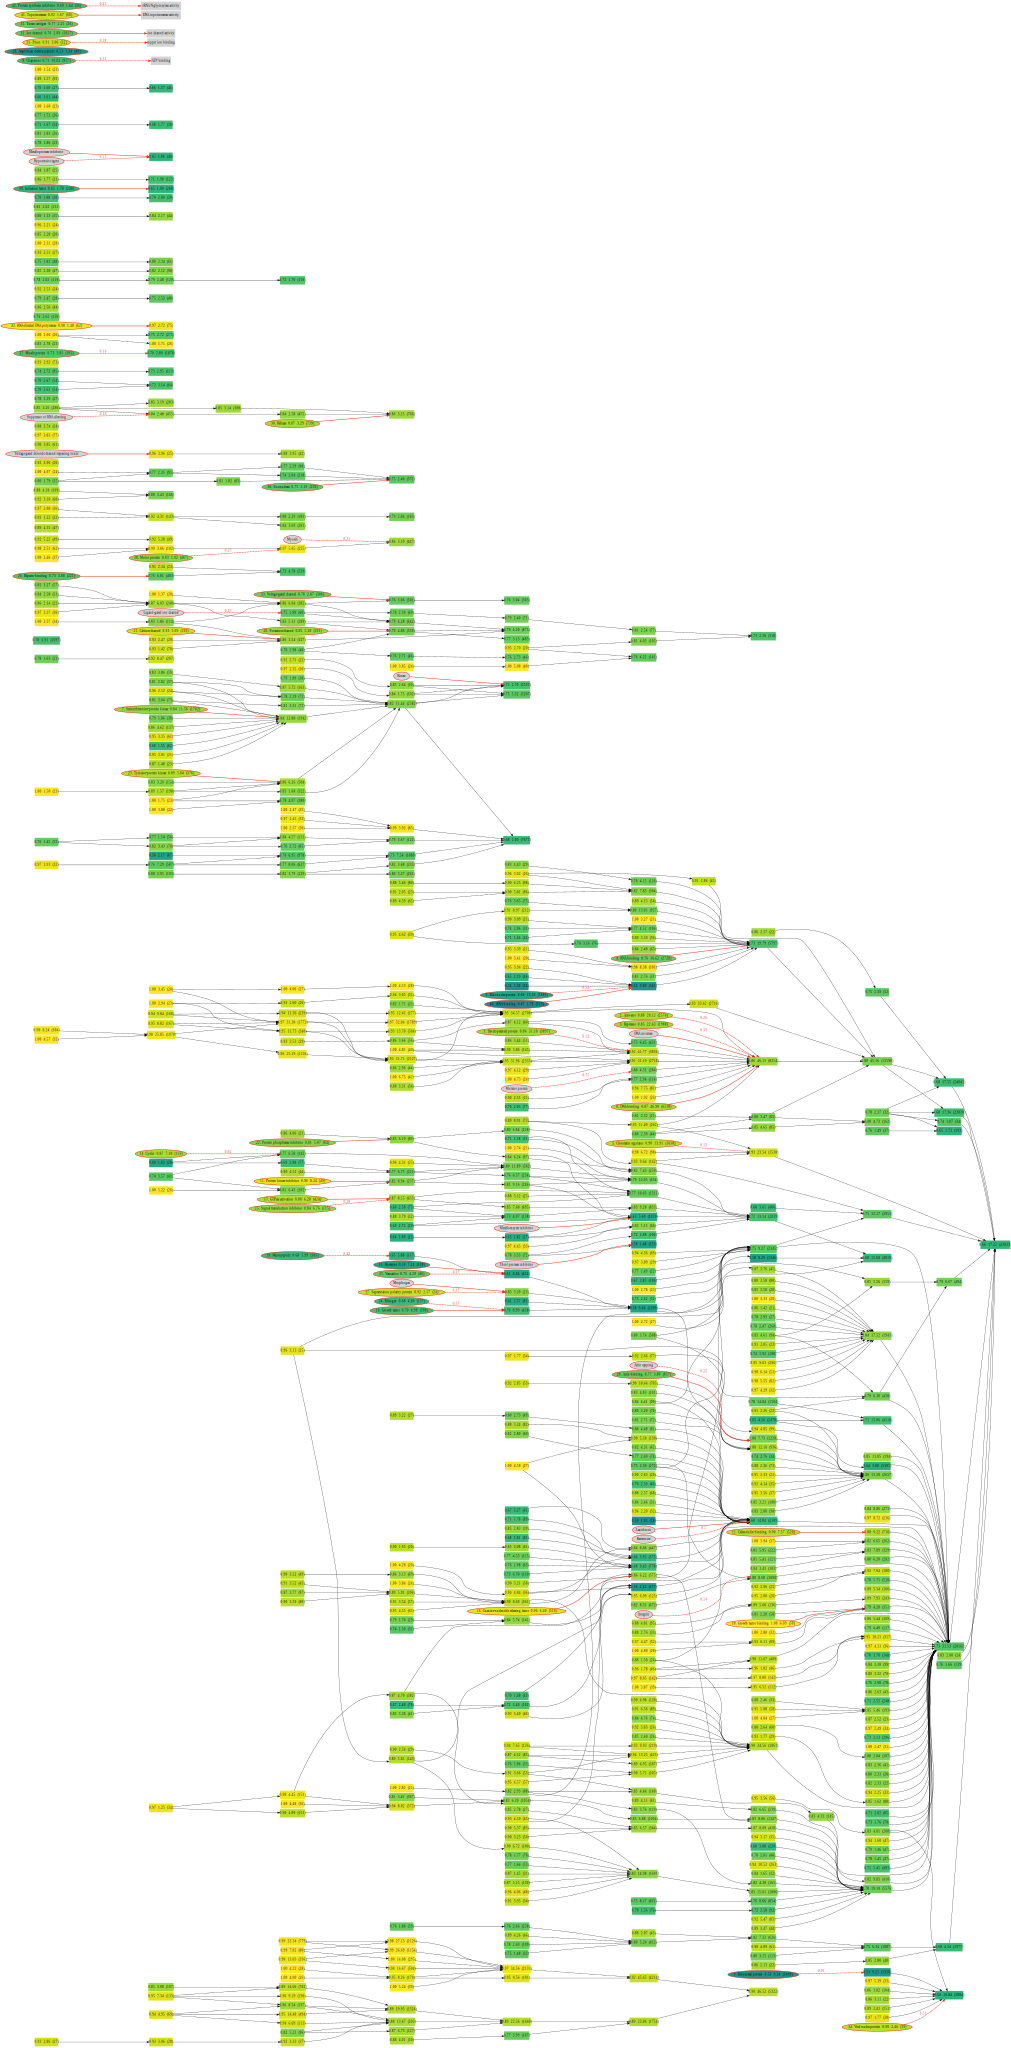

In [377]:
G = pgv.AGraph(directed=True, rankdir='LR', strict=False, splines='true',nodesep=0.05, ranksep=1)
G.node_attr['style']='filled'

Fj_term_df = Fj_go_valid_dis
Fj_kw_df = Fj_kw_valid_dis
kw_rank = {x:y for x,y in zip(Fj_kw_df['name'], range(200))}


import html

def addKeyword(G, kw, n=None, avg_len=None, avg_dis=None, z=None, p=None):
    synonyms = '\n    '.join([html.escape(sy)  for sy in kw.SY])
    tooltip = f"""# name: {kw.ID} ({kw.AC})\n# def: {html.escape(str(kw.DE))}\n# %s{synonyms}""" % ('synonyms:\n    ' if synonyms else '' )
    fontcolor = '#000000' if z is None or z > 0 else '#ffffff'
    fill_color = 'lightgray' if n is None else get_color(avg_dis)
    label = kw.ID if n is None else  '%d. %s  %0.2f  %0.2f  (%d)' %(kw_rank.get(kw.ID,'-1'), kw.ID, avg_dis, z, n)
#         label = (f'<<table border="0" cellborder="0" cellspacing="0">'
#                 '<tr><td>%d. %s </td><td>%0.2f</td> <td>%0.2f</td> <td>(%d)</td> </tr> </table>>') %(kw_rank.get(kw.ID,'-1'), kw.ID, avg_dis, z, n)
    G.add_node(kw.ID, label=label, shape='ellipse', fillcolor=fill_color, color='#ee2211', style='filled,bold', fontcolor=fontcolor, tooltip=tooltip,
               href = f"https://www.uniprot.org/keywords/{kw.AC}" )
    
def addTerm(G, t, n=None, avg_len=None, avg_dis=None, z=None, p=None):
    synonyms = '\n    '.join(["%s:%s"%(html.escape(s_name), t) for s_name, t, _ in t.synonym])
    tooltip = f"""# name: {t.name} ({t.id})\n# def: {html.escape(t.definition[0])}  {html.escape(str(t.definition[1:]))}\n# %s{synonyms}""" % ('synonyms:\n    ' if synonyms else '')
    fontcolor = '#000000' if z is None or z > 0 else '#ffffff'
    fill_color = 'lightgray' if n is None else get_color(avg_dis)
    label = t.name if n is None else '%0.2f  %0.2f  (%d)' %(avg_dis, z, n) #label = (f'<<table><tr><td>%0.2f</td> <td>%0.2f</td> <td>(%d)</td> </tr> </table>>') %( avg_dis, z, n)
    G.add_node(t.name, label=label, shape='rectangle', color=fill_color, fontcolor=fontcolor, tooltip=tooltip,
              href = f"https://www.ebi.ac.uk/QuickGO/GTerm?id={t.id}" )#, labelURL="https://www.ebi.ac.uk/QuickGO/GTerm?id="+t.id)

    
def drawGraph(G, Fj_term_df, Fj_kw_df, mapping):
    existing_term_set = set(Fj_term_df.index)
    existing_term_name_set = set(Fj_term_df.name)
    existing_kw_name_set = set(Fj_kw_df.name)
    
    existing_mapping_set = set(mapping.index) | set(mapping.go_name)
    
    # dodajemo termine
    
    for go, *xs in Fj_term_df.itertuples():
        name, n, avg_len, avg_dis, z, p = xs
        t = term_dict[go]
        addTerm(G, t, n, avg_len, avg_dis, z, p)

        for parent_id in t.is_a:
            if parent_id in existing_term_set:
                G.add_edge(name, term_dict[parent_id].name)
                
            
    # dodajemo keywords            

    for kw, *xs in Fj_kw_df.itertuples():
        name, n, avg_len, avg_dis, z, p = xs
        keyword = kw_name_dict[name]
        #if name in existing_mapping_set:
        addKeyword(G, keyword, n, avg_len, avg_dis, z, p)

    for kw_name, go_name, status in mapping.itertuples():
        style = 'bold' if status == 0 else 'bold,dashed'
        
        if kw_name in existing_kw_name_set or go_name in existing_term_name_set:
            label = zi_df.loc[(kw_name, go_name)].score if status != 0 else ''
            G.add_edge(kw_name, go_name, label=label, style=style, color="#ee2211", fontcolor="#ee2211")
                
            if kw_name not in existing_kw_name_set:
                keyword = kw_name_dict[kw_name]
                addKeyword(G, keyword)
                    
            if go_name not in existing_term_name_set:
                t = term_dict_name[go_name]
                addTerm(G, t)
                 
drawGraph(G, Fj_term_df, Fj_kw_df, combined_mappings)           
           
#print(G)
G.layout(prog='dot')
G.draw('data/OUT/disorder.svg', format='svg')
display.display_svg(G.draw(format='svg'), raw=True)

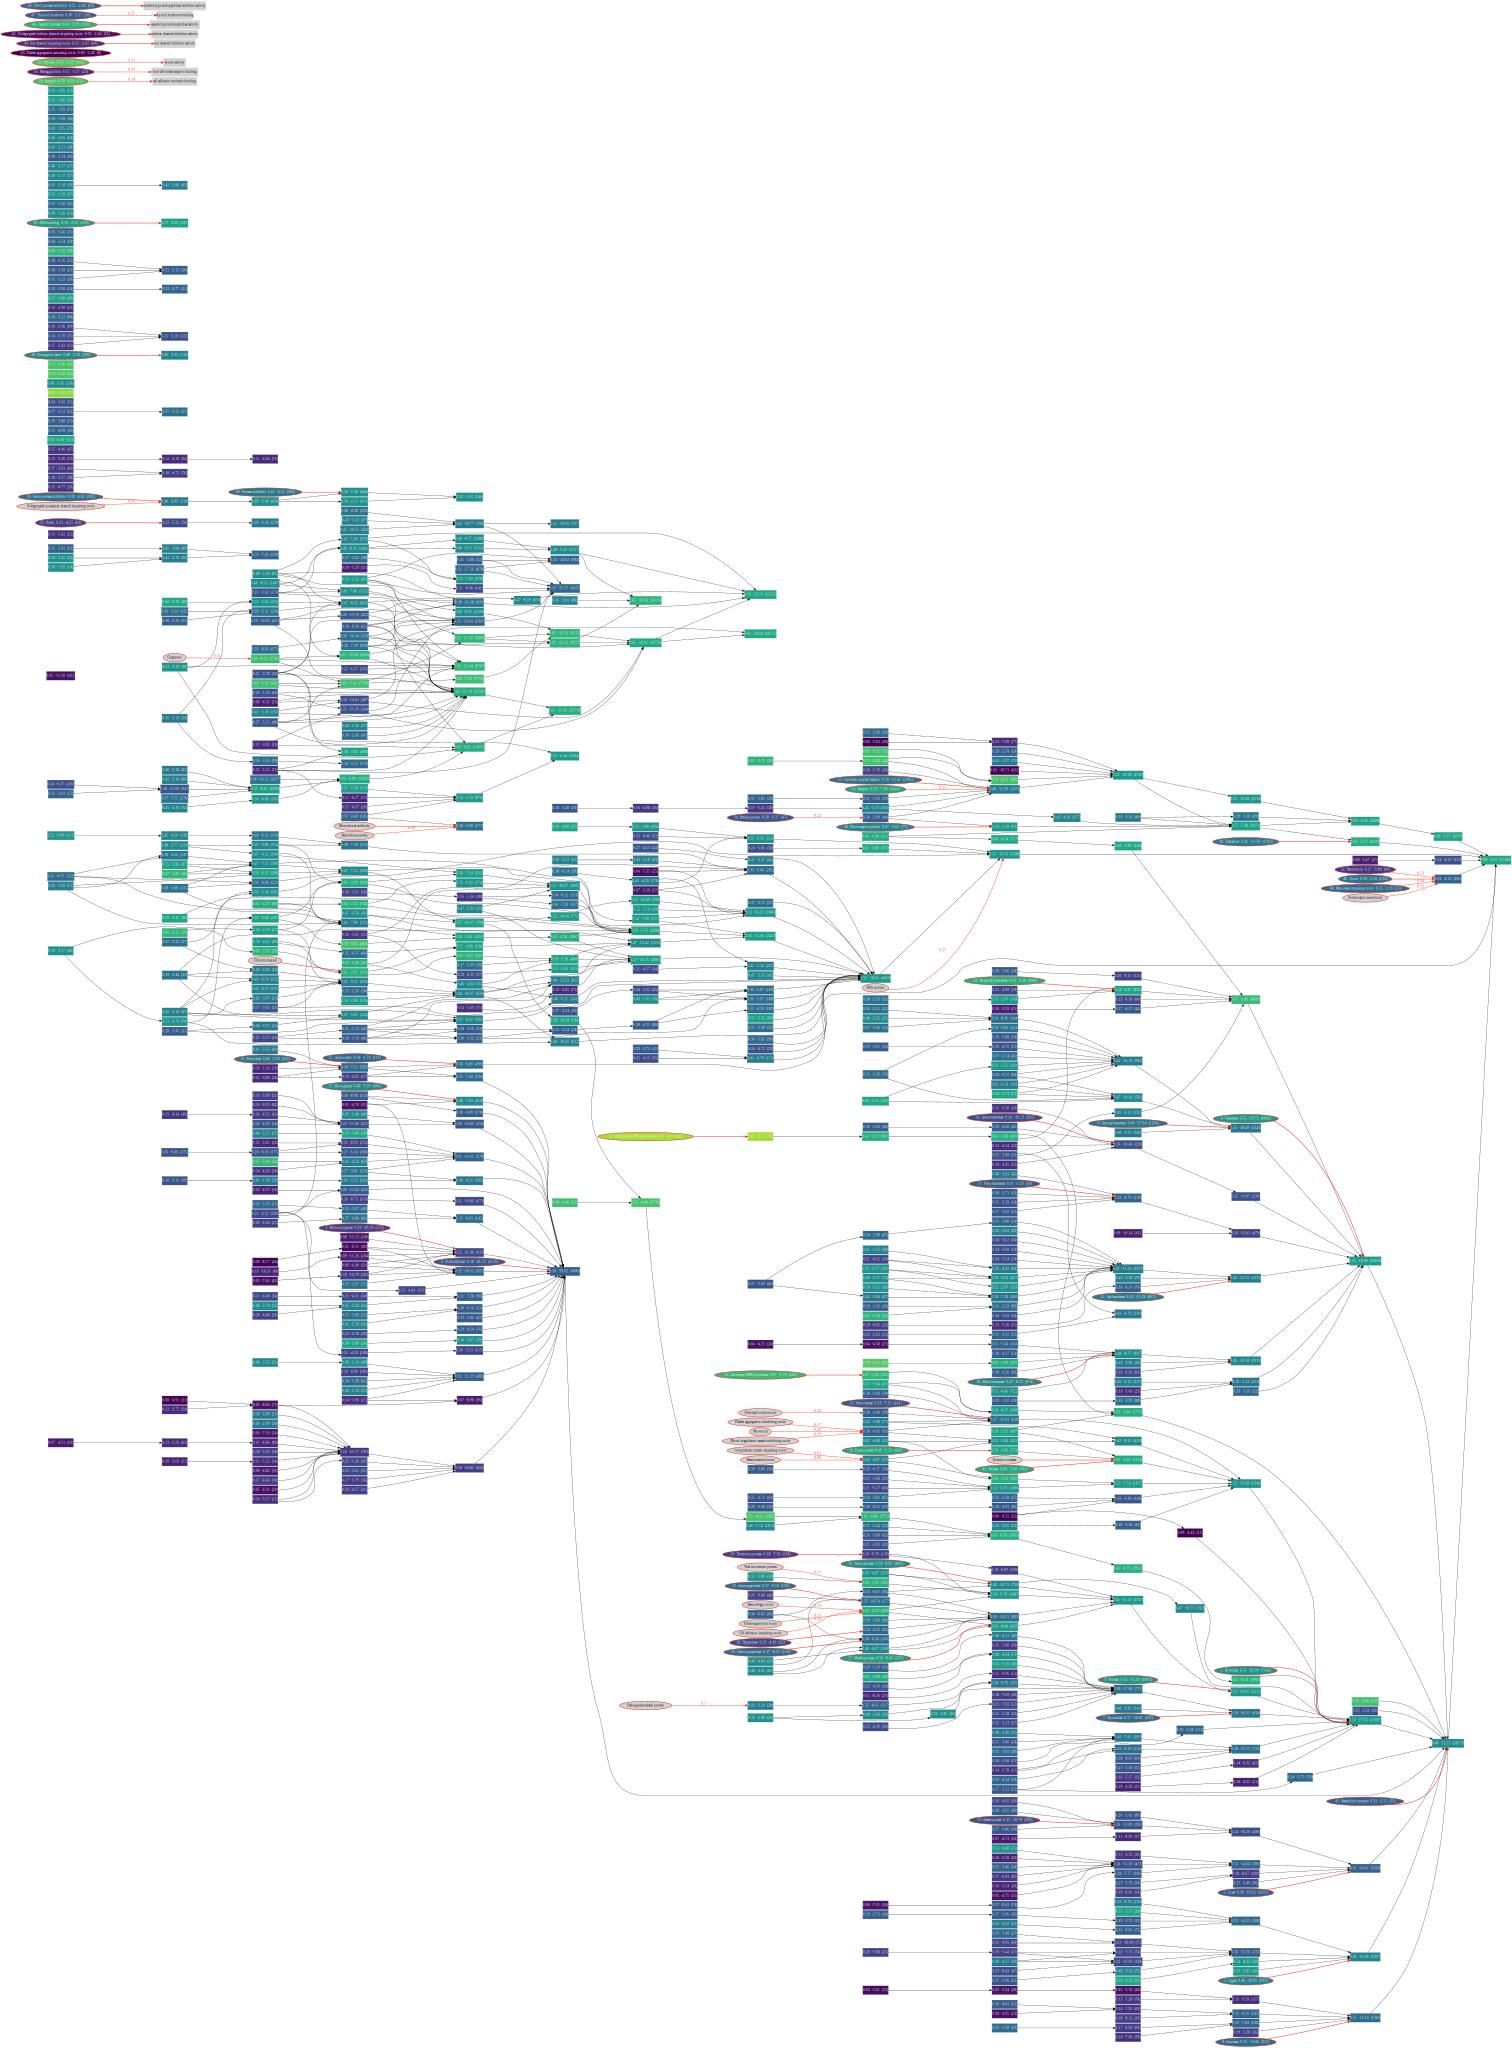

In [378]:
G = pgv.AGraph(directed=True, rankdir='LR', strict=False, splines='true',nodesep=0.05, ranksep=1)
G.node_attr['style']='filled'

Fj_term_df = Fj_go_valid_ord
Fj_kw_df = Fj_kw_valid_ord
kw_rank = {x:y for x,y in zip(Fj_kw_df['name'], range(200))}
drawGraph(G, Fj_term_df, Fj_kw_df, combined_mappings)           
           
#print(G)
G.layout(prog='dot')
G.draw('data/OUT/order.svg', format='svg')
display.display_svg(G.draw(format='svg'), raw=True)